In [56]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Lettura file e preprocessing

In [57]:
df = pd.read_csv('../Bank Marketing.csv')
df.shape

(45211, 17)

In [58]:
# Elimino colonne superflue
df_clustering = df.drop(columns=['Contact', 'Last Contact Day', 'Last Contact Month', 'Last Contact Duration', 'Campaign', 'Pdays'])

In [59]:
# Trasformo tutti i dati del dataframe in interi
df_encoded = df_clustering.copy()

label_encoder = LabelEncoder()

for column in df_clustering.columns:
    if df_clustering[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_clustering[column])

In [60]:
df_encoded.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Previous,Poutcome,Subscription
0,58,4,1,2,0,2143,1,0,0,3,1
1,44,9,2,1,0,29,1,0,0,3,1
2,33,2,1,1,0,2,1,1,0,3,1
3,47,1,1,3,0,1506,1,0,0,3,1
4,33,11,2,3,0,1,0,0,0,3,1


In [61]:
# Normalizzo il dataframe
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_encoded)

df_normalized = pd.DataFrame(df_normalized, columns=df_encoded.columns)

# DBSCAN con 2 dimensioni

In [62]:
pca = PCA(n_components=2)
np_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(np_pca)
df_pca = df_pca.drop(df_pca[df_pca[0] > 40].index)

In [ ]:
# Per trovare epsilon ottimale, non runnare perchè occupa molta memoria e dopo qualche iterazione crasha, è stato provato a parte

# Lista di valori di n_neighbors da esplorare
n_neighbors_values = range(100, 40100,5000)

avg_distances = []
for n_neighbors in n_neighbors_values:
    nn = NearestNeighbors(n_neighbors=n_neighbors)
    nn.fit(df_pca)
    distances, indices = nn.kneighbors(df_pca)
    distance = np.mean(np.sort(distances[:,1], axis=0))
    avg_distances.append(distance)
    print(str(n_neighbors) + ': ' + str(distance))

# Plot del grafico delle distanze medie dei vicini in funzione di n_neighbors
plt.plot(n_neighbors_values, avg_distances, marker='o')
plt.xlabel('Numero di Vicini (n_neighbors)')
plt.ylabel('Distanza Media del Vicino')
plt.title('Valutazione di n_neighbors')
plt.grid(True)
plt.show()

In [63]:
dbscan = DBSCAN(eps=0.6, min_samples=50)
clusters = dbscan.fit_predict(df_pca)

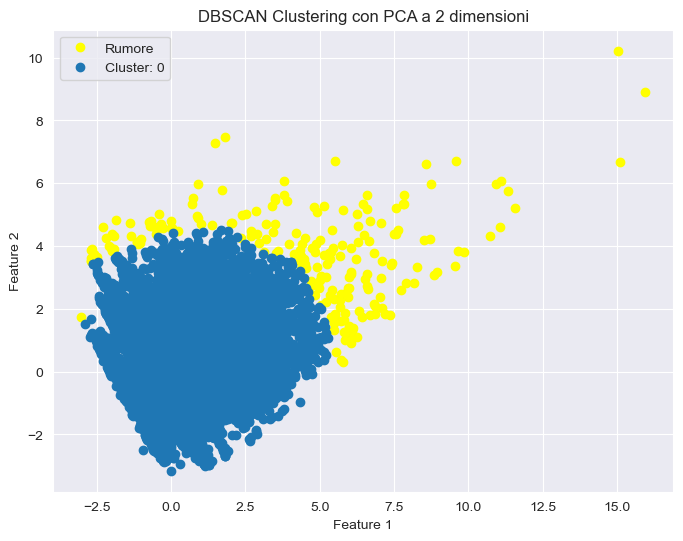

In [64]:
# Genera una lista di 20 colori diversi, da utilizzare in seguito per colorare in maniera differente i diversi cluster
colori = sns.color_palette(n_colors=20)

plt.figure(figsize=(8, 6))
for cluster_id in np.unique(clusters):
    cluster_points = df_pca[clusters == cluster_id]

    # Coloro il rumore di giallo
    if cluster_id == -1:
        plt.plot(cluster_points[0], cluster_points[1], 'o', color='yellow', label=f'Rumore')
        continue
    plt.plot(cluster_points[0], cluster_points[1], 'o', color=colori[cluster_id], label=f'Cluster: {cluster_id}')

plt.title('DBSCAN Clustering con PCA a 2 dimensioni')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# DBSCAN con 3 dimensioni

In [65]:
pca = PCA(n_components=3)
np_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(np_pca)
df_pca = df_pca.drop(df_pca[df_pca[0] > 40].index)

In [66]:
dbscan = DBSCAN(eps=0.9, min_samples=50)
clusters = dbscan.fit_predict(df_pca)

In [67]:
# Creo un DataFrame apposito per ottimizzare il plot dei grafici
df_con_cluster = pd.DataFrame(clusters)
df_per_merge = df_con_cluster.rename(columns={0: 'Cluster predetto'})
df_per_stampa = pd.merge(df_pca, df_per_merge['Cluster predetto'], left_index=True, right_index=True)
df_per_stampa

,0,1,2,Cluster predetto
0,-0.670206,0.582027,-0.370482,0
1,0.084451,-1.116887,-0.044159,0
2,-0.652242,-0.527060,1.866590,0
3,-0.181182,-0.238314,-0.227388,0
4,0.805093,-2.297960,-2.169142,0
...,...,...,...,...
45205,0.786685,-1.705159,-1.129662,0
45206,0.117330,0.365472,-2.875648,0
45207,-1.647757,3.245975,-1.806377,0
45208,0.547295,3.057842,-2.540751,0


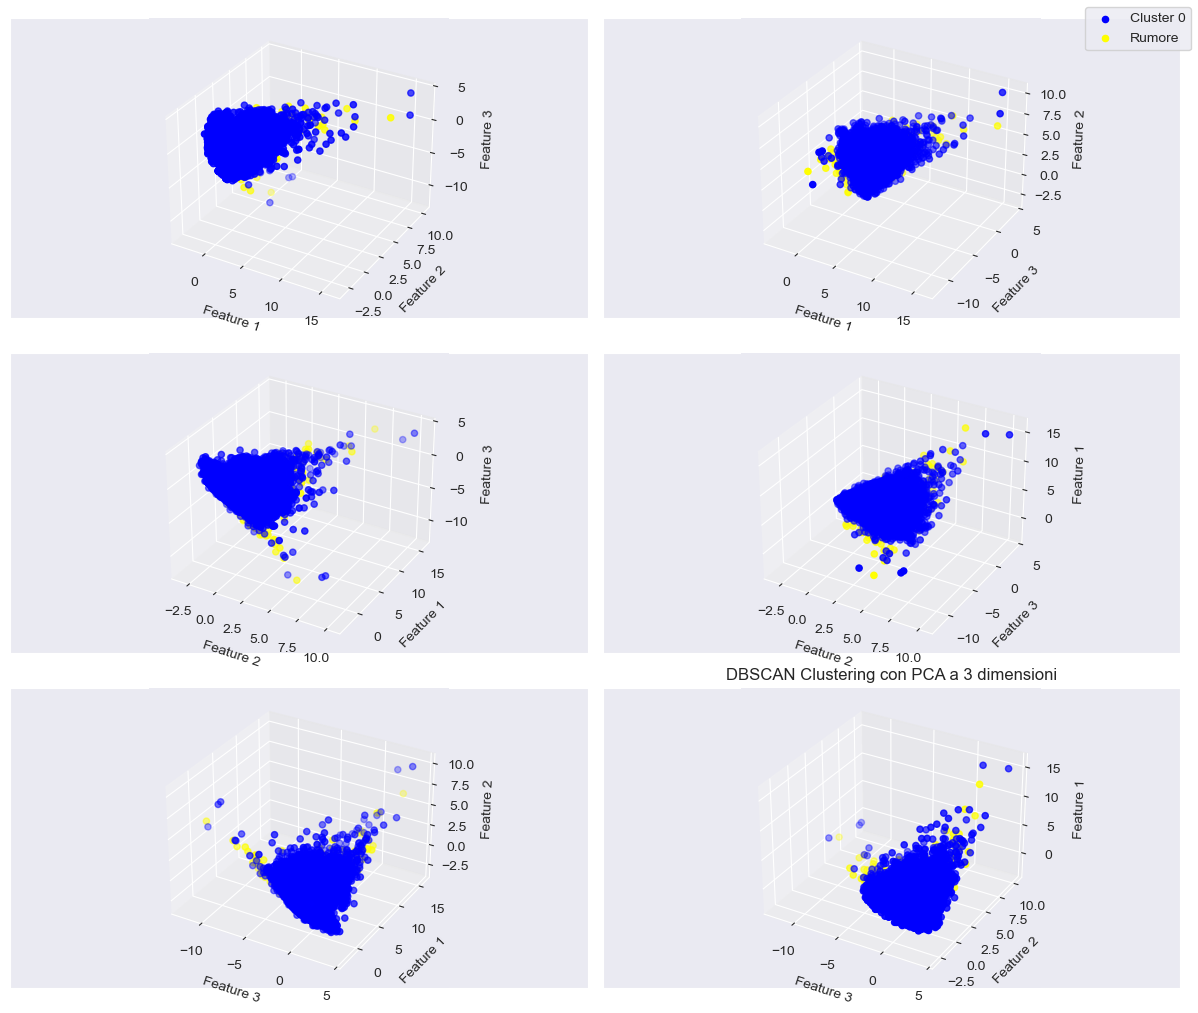

In [68]:
colors = ['blue', 'green', 'brown', 'brown']

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
legend_handles = []

for ax in axs:
    for asse in ax:
        asse.set_xticks([])
        asse.set_yticks([])

ax_1 = fig.add_subplot(3, 2, 1, projection='3d')
ax_1.set_xlabel('Feature 1')
ax_1.set_ylabel('Feature 2')
ax_1.set_zlabel('Feature 3')

ax_2 = fig.add_subplot(3, 2, 2, projection='3d')
ax_2.set_xlabel('Feature 1')
ax_2.set_ylabel('Feature 3')
ax_2.set_zlabel('Feature 2')

ax_3 = fig.add_subplot(3, 2, 3, projection='3d')
ax_3.set_xlabel('Feature 2')
ax_3.set_ylabel('Feature 1')
ax_3.set_zlabel('Feature 3')

ax_4 = fig.add_subplot(3, 2, 4, projection='3d')
ax_4.set_xlabel('Feature 2')
ax_4.set_ylabel('Feature 3')
ax_4.set_zlabel('Feature 1')

ax_5 = fig.add_subplot(3, 2, 5, projection='3d')
ax_5.set_xlabel('Feature 3')
ax_5.set_ylabel('Feature 1')
ax_5.set_zlabel('Feature 2')

ax_6 = fig.add_subplot(3, 2, 6, projection='3d')
ax_6.set_xlabel('Feature 3')
ax_6.set_ylabel('Feature 2')
ax_6.set_zlabel('Feature 1')

cluster_labels = pd.unique(clusters)

for cluster in cluster_labels.tolist():
    cluster_data = df_per_stampa.loc[df_per_stampa['Cluster predetto'] == cluster]
    feat_1 = cluster_data[0]
    feat_2 = cluster_data[1]
    feat_3 = cluster_data[2]
    # Coloro il rumore di giallo
    if cluster == -1:
        legend_handles.append(ax_1.scatter(feat_1, feat_2, feat_3, label='Rumore',c='yellow'))
        ax_2.scatter(feat_1, feat_3, feat_2, label='Rumore',c='yellow')
        ax_3.scatter(feat_2, feat_1, feat_3, label='Rumore',c='yellow')
        ax_4.scatter(feat_2, feat_3, feat_1, label='Rumore',c='yellow')
        ax_5.scatter(feat_3, feat_1, feat_2, label='Rumore',c='yellow')
        ax_6.scatter(feat_3, feat_2, feat_1, label='Rumore',c='yellow')

    # Coloro gli altri cluster di colori diversi
    else:
        color = colors[cluster]
        legend_handles.append(ax_1.scatter(feat_1, feat_2, feat_3, label=f'Cluster {cluster}',c=color))
        ax_2.scatter(feat_1, feat_3, feat_2, label=f'Cluster {cluster}',c=color)
        ax_3.scatter(feat_2, feat_1, feat_3, label=f'Cluster {cluster}',c=color)
        ax_4.scatter(feat_2, feat_3, feat_1, label=f'Cluster {cluster}',c=color)
        ax_5.scatter(feat_3, feat_1, feat_2, label=f'Cluster {cluster}',c=color)
        ax_6.scatter(feat_3, feat_2, feat_1, label=f'Cluster {cluster}',c=color)

plt.title('DBSCAN Clustering con PCA a 3 dimensioni')
plt.tight_layout()
fig.legend(handles=legend_handles,loc='upper right')
plt.show()
